In [11]:
from sklearn.decomposition import PCA, SparsePCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ipywidgets import interact
from IPython import display
import pickle

In [2]:
!pwd

/home/ah19/live-time-monitoring/ExploringPackages


In [3]:
import sys
sys.path.append('/home/ah19/live-time-monitoring/utilities')

In [6]:
from utils import *
from folderStructure import fetchPaths

In [7]:
base = Path("/home/ah19/live-time-monitoring")
paths = fetchPaths(base, 'MNIST')

path = paths['mnist']
path_bdd = paths['bdd']
path_bdd_csv = paths['bdd_csv']
path_bdd_figs = paths['bdd_figs']
path_bdd_pickle = paths['bdd_pickle']
path_data = paths['data']
path_lastHiddenLayer = paths['lastHiddenLayer']
path_logs = paths['logs']
path_models = paths['models']
path_models_pth_tar = paths['models_pth_tar']
path_monitor = paths['monitor']
path_patternPlot = paths['patternPlot']
path_pca = paths['pca']
path_regularization = paths['regularization']
path_regularization_figs = paths['regularization_figs']

base, path

(PosixPath('/home/ah19/live-time-monitoring'),
 PosixPath('/home/ah19/live-time-monitoring/MNIST'))

In [12]:
model_name = "MNIST-ElasticAllClasses"
df_file = path_lastHiddenLayer / (model_name + '_val.csv')
df_file

PosixPath('/home/ah19/live-time-monitoring/MNIST/lastHiddenLayer/MNIST-ElasticAllClasses_val.csv')

In [17]:
df = pd.read_csv(df_file)

In [18]:
df = df.drop('y_pred', axis=1)
df.rename({'y_true': 'y'}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      6000 non-null   float64
 1   x1      6000 non-null   float64
 2   x2      6000 non-null   float64
 3   x3      6000 non-null   float64
 4   x4      6000 non-null   float64
 5   x5      6000 non-null   float64
 6   x6      6000 non-null   float64
 7   x7      6000 non-null   float64
 8   x8      6000 non-null   float64
 9   x9      6000 non-null   float64
 10  x10     6000 non-null   float64
 11  x11     6000 non-null   float64
 12  x12     6000 non-null   float64
 13  x13     6000 non-null   float64
 14  x14     6000 non-null   float64
 15  x15     6000 non-null   float64
 16  x16     6000 non-null   float64
 17  x17     6000 non-null   float64
 18  x18     6000 non-null   float64
 19  x19     6000 non-null   float64
 20  x20     6000 non-null   float64
 21  x21     6000 non-null   float64
 22  

In [19]:
y = df['y']
df.drop('y', axis=1, inplace=True)

In [20]:
pca = PCA()
df_pca = pd.DataFrame( pca.fit_transform(df), columns=[f'PC_{i}' for i in range(df.shape[1])] )

In [21]:
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,2.165805,-2.234521,-0.125819,2.070791,0.915528,-2.027973,1.121928,-0.332774,-0.023683,0.310485,...,0.016696,-0.259578,0.163041,-0.058516,-0.276432,-0.022059,0.314778,0.203303,-0.075006,0.080109
1,-1.220083,2.669223,0.129540,-0.118303,-2.327297,-1.865581,0.247060,-0.378114,0.762062,1.196873,...,-0.065178,0.004447,-0.214564,0.047236,-0.242545,0.196256,-0.215342,-0.107680,-0.301924,0.077148
2,-0.886964,3.500054,0.554648,-0.336554,-2.718987,-1.050624,1.118441,0.017313,0.507377,1.787802,...,0.229549,-0.069433,-0.275234,0.035782,0.074548,-0.137035,-0.031685,0.192853,-0.286911,-0.162505
3,-2.215064,-1.543117,0.590043,0.446585,1.015469,-0.213418,-0.921301,1.208003,-0.807080,1.191634,...,0.026554,0.445268,0.126485,0.284005,-0.247601,0.290639,0.342305,-0.036784,-0.219547,-0.035670
4,0.044606,0.418484,-1.252039,-2.599529,1.407108,0.132544,-0.353111,-0.836163,-0.739882,-0.351908,...,0.147407,0.116025,0.372335,-0.437118,-0.336903,-0.251650,0.127881,-0.004340,-0.134880,-0.182281


In [22]:
pca_loading = pd.DataFrame(pca.components_ * np.sqrt(pca.explained_variance_), columns=[f'PC_{i}' for i in range(df.shape[1])])

In [23]:
pca_loading.shape

(30, 30)

In [40]:
pca_loading.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29
0,0.410657,0.087021,-0.054632,-0.511012,0.098768,-0.075683,-0.092462,0.046710,0.098691,0.078831,...,-0.055408,0.003678,-0.094246,0.032127,0.087481,-0.000059,-0.025156,0.053397,0.030984,0.013259
1,0.424119,-0.170830,0.031718,0.081186,0.122113,-0.222917,-0.206600,0.399569,-0.134768,-0.220726,...,-0.034363,-0.048134,-0.044540,0.040441,-0.043914,0.139002,-0.020421,0.002073,-0.016924,-0.043653
2,0.090996,0.241612,-0.527111,0.134939,-0.151188,0.186970,0.250262,-0.080150,-0.002738,-0.006072,...,-0.008365,-0.151357,-0.084602,0.049086,-0.042581,-0.013380,0.071212,-0.008276,-0.057904,0.067295
3,0.569091,0.013740,0.280972,0.110508,-0.370692,0.043504,-0.080568,0.105654,-0.132864,-0.196821,...,0.018667,-0.048274,0.051769,-0.082888,0.023871,0.003165,-0.039888,-0.024197,0.074499,0.083552
4,0.297723,-0.135234,-0.020622,0.078517,0.378449,-0.020279,-0.180202,-0.270631,-0.156596,0.195716,...,-0.048905,-0.042625,0.007370,0.104215,0.034014,0.016467,-0.078478,-0.067533,0.050177,-0.007345


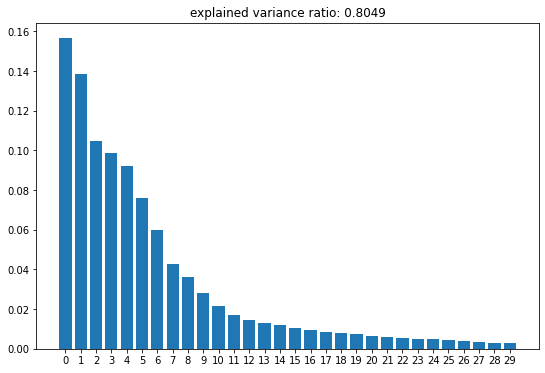

In [25]:
plt.close("all")
plt.figure(figsize=(9, 6))
plt.bar(pca_loading.index, pca.explained_variance_ratio_)
plt.xticks(pca_loading.index)
plt.title(f'explained variance ratio: {pca.explained_variance_ratio_[:9].sum().round(4)}')
plt.show()

In [26]:
def make_bar(col='0'):
    plt.figure(figsize=(9, 6))
    plt.bar(pca_loading.index, pca_loading[col])
    plt.yticks(np.arange(-1,1.1, 0.1))
    plt.xticks(pca_loading.index)
    plt.grid(True)
    
interact(
    make_bar,
    col=pca_loading.columns
)

interactive(children=(Dropdown(description='col', options=('PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC…

<function __main__.make_bar(col='0')>

In [27]:
pca.explained_variance_

array([3.17540227, 2.80848648, 2.12308179, 2.00334712, 1.87115989,
       1.53775103, 1.21448151, 0.8632924 , 0.72976159, 0.57114375,
       0.43588427, 0.3486107 , 0.29205734, 0.26714922, 0.24257104,
       0.21481176, 0.19234995, 0.17342706, 0.15711982, 0.14716944,
       0.13023183, 0.12203856, 0.1058279 , 0.10393373, 0.09689369,
       0.08700115, 0.07782105, 0.07309329, 0.06127865, 0.05735242])

In [28]:
pca.singular_values_

array([138.01897778, 129.80027116, 112.85551671, 109.6270011 ,
       105.94851671,  96.04669925,  85.35616324,  71.96451298,
        66.16524613,  58.53453114,  51.13579716,  45.73090389,
        41.85751997,  40.03283885,  38.14686979,  35.8978513 ,
        33.96921181,  32.25506027,  30.70116974,  29.71311999,
        27.95104249,  27.05751834,  25.1964599 ,  24.96995088,
        24.10944288,  22.84556568,  21.6066765 ,  20.94007281,
        19.17317465,  18.54877828])

In [29]:
df_01 = pd.DataFrame()

In [30]:
for c in df.columns:
    df_01[c] = np.where( df[c].values > 0, 1, 0)

In [31]:
df_01['y'] = y

In [32]:
neuron_calss_balance = df_01.groupby('y')['y'].count()
neuron_calss_balance

y
0    583
1    666
2    575
3    622
4    596
5    518
6    610
7    656
8    597
9    577
Name: y, dtype: int64

In [33]:
df_01_neurons_counts = df_01.groupby('y').sum()
df_01_neurons_counts

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29
y,,,,,,,,,,,,,,,,,,,,,
0,170,9,6,579,64,371,14,582,279,13,...,383,1,16,509,274,578,507,13,114,76
1,655,10,6,312,131,657,4,16,396,660,...,589,0,15,642,665,26,41,11,664,655
2,551,363,37,186,61,187,367,429,293,28,...,85,2,80,200,484,113,197,488,93,540
3,86,53,3,375,502,204,467,55,619,562,...,10,9,31,299,611,64,570,545,49,148
4,375,15,519,593,428,226,33,54,128,99,...,24,1,587,212,435,64,69,5,508,447
5,205,79,9,298,509,153,118,65,196,477,...,19,55,59,517,433,279,94,257,100,34
6,602,38,392,277,569,201,15,590,153,65,...,8,4,50,498,563,599,22,69,499,136
7,98,599,3,642,42,633,599,35,275,377,...,222,0,56,495,289,125,633,18,98,602
8,115,460,454,251,206,444,30,92,511,363,...,16,273,163,248,479,124,43,13,252,114


In [34]:
df_01_neurons_weights = df_01_neurons_counts.T

for i, n in enumerate(neuron_calss_balance):
    df_01_neurons_weights[i] = df_01_neurons_weights[i] / n
    
df_01_neurons_weights = df_01_neurons_weights.T

In [35]:
df_01_neurons_weights.T.median()

y
0    0.347341
1    0.265015
2    0.345217
3    0.235531
4    0.179530
5    0.327220
6    0.178689
7    0.307927
8    0.380235
9    0.318024
dtype: float64

In [36]:
df_01_neurons_weights.T.describe().T[['std', 'min', 'max']]

,std,min,max
y,,,
0,0.398509,0.001715,0.998285
1,0.439018,0.000000,0.998498
2,0.353425,0.003478,0.984348
3,0.365861,0.004823,0.995177
4,0.371738,0.001678,0.994966
5,0.316392,0.013514,0.998069
6,0.367682,0.003279,0.986885
7,0.374058,0.000000,0.978659
8,0.277373,0.021776,0.968174


In [37]:
cls = 0
num_component = 9

pd.DataFrame({
    "neurons_counts": df_01_neurons_counts.iloc[cls],
    "neurons_weights": df_01_neurons_weights.iloc[cls]
})


,neurons_counts,neurons_weights
x0,170,0.291595
x1,9,0.015437
x2,6,0.010292
x3,579,0.993139
x4,64,0.109777
x5,371,0.636364
x6,14,0.024014
x7,582,0.998285
x8,279,0.478559
x9,13,0.022298


In [38]:
def sofmax_(arr):
    exp_ = np.exp( arr )
    return exp_ / np.sum(exp_)

pd.DataFrame({
    "variance_ratio": pca.explained_variance_ratio_[:num_component],
    "variance_softmax": sofmax_(pca.explained_variance_ratio_[:num_component]),
    "pca_loading": pca_loading.iloc[cls, :num_component]
})

,variance_ratio,variance_softmax,pca_loading
PC_0,0.156543,0.118735,0.410657
PC_1,0.138455,0.116607,0.087021
PC_2,0.104665,0.112733,-0.054632
PC_3,0.098762,0.112069,-0.511012
PC_4,0.092246,0.111341,0.098768
PC_5,0.075809,0.109526,-0.075683
PC_6,0.059872,0.107795,-0.092462
PC_7,0.042559,0.105944,0.046710
PC_8,0.035976,0.105249,0.098691


In [39]:
np.exp( pca.explained_variance_ratio_[:num_component] ) / np.sum( np.exp( pca.explained_variance_ratio_[:num_component] ) )

array([0.11873543, 0.116607  , 0.11273273, 0.11206925, 0.11134131,
       0.1095262 , 0.10779454, 0.10594434, 0.10524921])